# Numpy Introduction

## TODO: add numpy and python examples

# Orthogonal Projections

We will write functions that will implement orthogonal projections.

In [1]:
import numpy as np

## 1. Orthogonal Projections

Recall that for projection of a vector $\boldsymbol x$ onto a 1-dimensional subspace $U$ with basis vector $\boldsymbol b$ we have

$${\pi_U}(\boldsymbol x) = \frac{\boldsymbol b\boldsymbol b^T}{{\lVert\boldsymbol  b \rVert}^2}\boldsymbol x $$

And for the general projection onto an M-dimensional subspace $U$ with basis vectors $\boldsymbol b_1,\dotsc, \boldsymbol b_M$ we have

$${\pi_U}(\boldsymbol x) = \boldsymbol B(\boldsymbol B^T\boldsymbol B)^{-1}\boldsymbol B^T\boldsymbol x $$

where 

$$\boldsymbol B = [\boldsymbol b_1,...,\boldsymbol b_M]$$


Your task is to implement orthogonal projections. We can split this into two steps
1. Find the projection matrix $\boldsymbol P$ that projects any $\boldsymbol x$ onto $U$.
2. The projected vector $\pi_U(\boldsymbol x)$ of $\boldsymbol x$ can then be written as $\pi_U(\boldsymbol x) = \boldsymbol P\boldsymbol x$.

To perform step 1, you need to complete the function `projection_matrix_1d` and `projection_matrix_general`. To perform step 2, complete `project_1d` and `project_general`.

### Projection (1d)


In [2]:
def projection_matrix_1d(b):
    """Compute the projection matrix onto the space spanned by `b`
    Args:
        b: ndarray of dimension (D,), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    # YOUR CODE HERE  # 5
    D, = b.shape
    P = np.matmul(b.reshape((-1, 1)), b.reshape(1, D)) / (np.linalg.norm(b) ** 2) # EDIT THIS
    print(P)

In [3]:
b = np.array([1,0,0])
projection_matrix_1d(b)
D, = b.shape
np.matmul(b.reshape((-1, 1)), b.reshape(1, D))

[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

With the help of the function `projection_matrix_1d`, you should be able 
to implement `project_1d`.

In [4]:
def project_1d(x, b):
    """Compute the projection matrix onto the space spanned by `b`
    Args:
        x: the vector to be projected
        b: ndarray of dimension (D,), the basis for the subspace
    
    Returns:
        y: ndarray of shape (D,) projection of x in space spanned by b
    """
    # YOUR CODE HERE
    p = projection_matrix_1d(b) @ x  # 5
    return p


### Projection (ND)

In [5]:
def projection_matrix_general(B):
    """Compute the projection matrix onto the space spanned by the columns of `B`
    Args:
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    # YOUR CODE HERE
    
    P = B @ np.linalg.inv(B.T @ B) @ B.T  # 5
    return P

In [6]:
def project_general(x, B):
    """Compute the projection matrix onto the space spanned by the columns of `B`
    Args:
        x: ndarray of dimension (D, 1), the vector to be projected
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        p: projection of x onto the subspac spanned by the columns of B; size (D, 1)
    """
    # YOUR CODE HERE

    p = projection_matrix_general(B) @ x  # 5
    return p

# Project digits images
In this part we load some persian digits data to perform projection to.

In [7]:
load_limit = 100

def load_data(filename):
    fh = open(filename, 'r')
    file_length = len(fh.readlines())
    fh.seek(0, 0)
    data = np.zeros(shape=(min(load_limit, file_length), 1200))
    for i, line in enumerate(fh):
        if i == min(load_limit, file_length):
            break
        a_list = line.split(',')
        map_object = map(int, a_list)
        data[i] = list(map_object)
    fh.close()
    return data

`show_image` will convert (1200, 1) vector into the image

In [8]:
import matplotlib.pyplot as plt
def show_image(vector, save_path='no'):  # the input is a 1 * 1200 vector and should convert to a 40 * 30 image
    vector = vector.reshape(40, 30) * 255
    plt.imshow(vector, cmap='Greys_r', vmin=0, vmax=255)
    if save_path != 'no':
        plt.savefig(save_path)
    plt.show()

first 5 images:

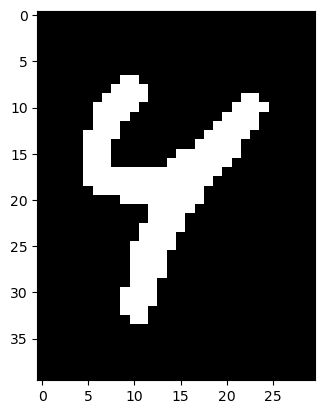

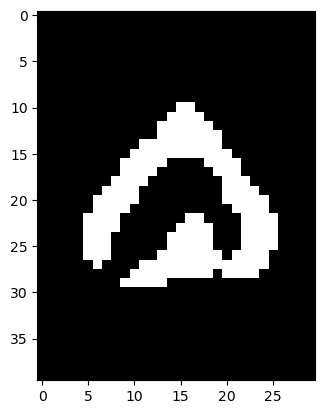

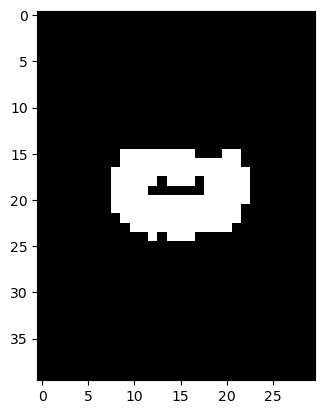

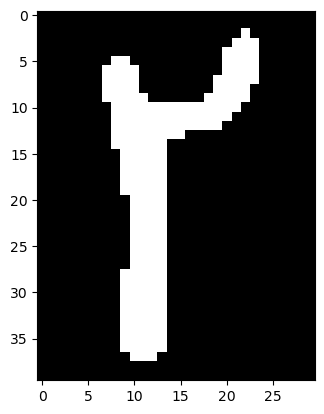

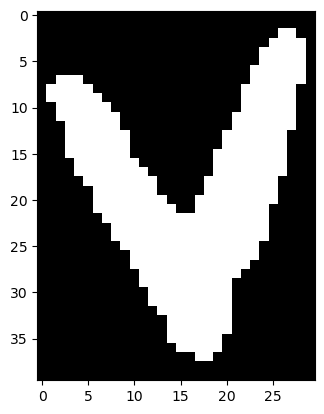

In [9]:
a = load_data("TrainData.txt")  # 10
for i in range(5):
    show_image(a[i])

## project to random B
in this part we want to project first 5 images into a random numpy array with shape=(1200, x)

find the minimum of x that images still can be verified

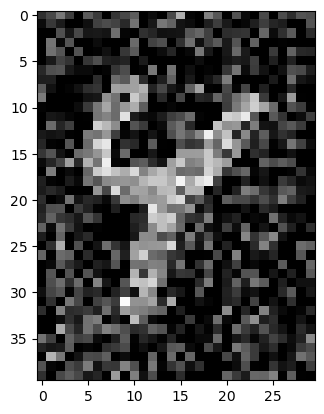

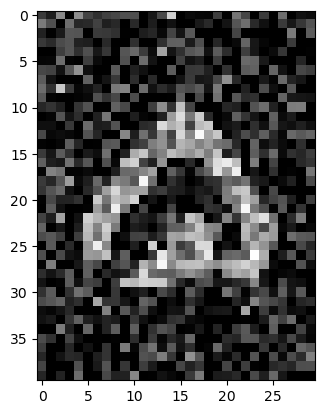

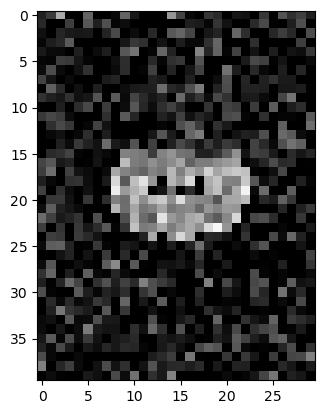

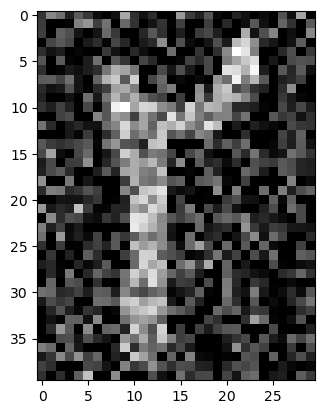

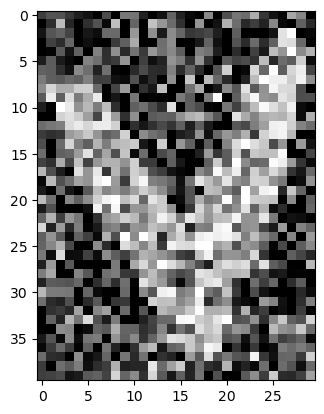

In [13]:
# YOUR CODE HERE
b = np.random.rand(1200, 500)
for i in range (5):
    show_image(project_general(a[i], b))

# Random Projection

# TODO: check the last algorithm (is it random projection or not?)

# TODO: add random projection alg. o.w.